In [1]:
# https://blog.socialcops.com/engineering/machine-learning-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [3]:
!wget https://raw.githubusercontent.com/davewadestein/sf-ml-five-day/refs/heads/main/src/data/titanic3.xls

--2025-01-10 21:31:21--  https://raw.githubusercontent.com/davewadestein/sf-ml-five-day/refs/heads/main/src/data/titanic3.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284160 (278K) [application/octet-stream]
Saving to: ‘titanic3.xls’

titanic3.xls        100%[===================>] 277.50K  --.-KB/s    in 0.01s   

2025-01-10 21:31:21 (21.2 MB/s) - ‘titanic3.xls’ saved [284160/284160]



# Let's read in the Titanic data for a deeper analysis

In [48]:
data = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

## Legend
* pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival (0 = No; 1 = Yes)
* sibsp = number of Siblings/Spouses Aboard
* parch = number of Parents/Children Aboard
* ticket = ticket Number
* embarked (from...C = Cherbourg; Q = Queenstown; S = Southampton)
* boat = Lifeboat ID
* body = ID Number
* home.dest = Home/Destination

In [49]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### These columns are unlikely to be meaningful and have several missing values so we'll drop them.

In [50]:
data = data.drop(['boat', 'ticket', 'cabin', 'body'], axis=1)

### We can get a quick summary of how many people survived.

In [51]:
data['survived'].value_counts()

,count
survived,
0,809
1,500


### Because we encode survival as '1', finding the mean will give us a survival percentage.

In [52]:
data['survived'].mean()

0.3819709702062643

### If we group by class and then compute the mean, what does this reveal?

In [53]:
data.groupby('pclass').mean(numeric_only=True)

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992
2,0.429603,29.506705,0.393502,0.368231,21.179196
3,0.255289,24.816367,0.568406,0.400564,13.302889


### Pandas groupby() method essentially creates a bunch of dataframes in which the all the columns match the various values of the grouping variables...
* we can see this by looking at the __`groups`__ attribute
* each grouping contains the rows of the dataframe
* so in the example below, rows 0, 2, 4, 6, 8, etc. are the females in 1st class

In [13]:
data.groupby(['pclass', 'sex']).groups

{(1, 'female'): [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], (1, 'male'): [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...], (2, 'female'): [324, 329, 333, 337, 340, 341, 342, 344, 349, 350, 3

### If we group by class and gender and compute the mean, what does this tell us about the "Women" part of "Women and children first?"

In [54]:
class_gender_grouping = data.groupby(['pclass', 'sex']).mean(numeric_only=True)
class_gender_grouping

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

### Let's render it as a bar chart to make it clear...

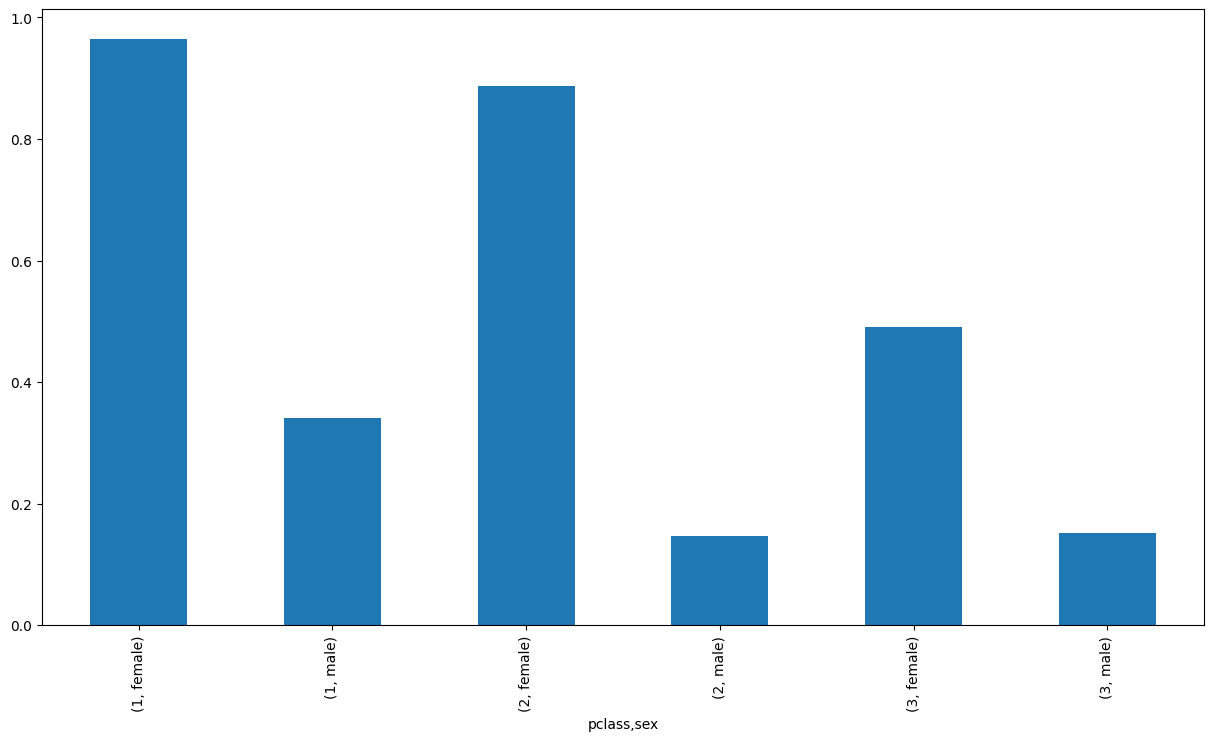

In [56]:
class_gender_grouping.survived.plot.bar();

### If we investigate the passengers by age, we can investigate the "Children" part of "Women and children first".

In [58]:
group_by_age = pd.cut(data.age, np.arange(0, 90, 10))
age_grouping = data.groupby(group_by_age, observed=False)['survived'].mean(numeric_only=True)

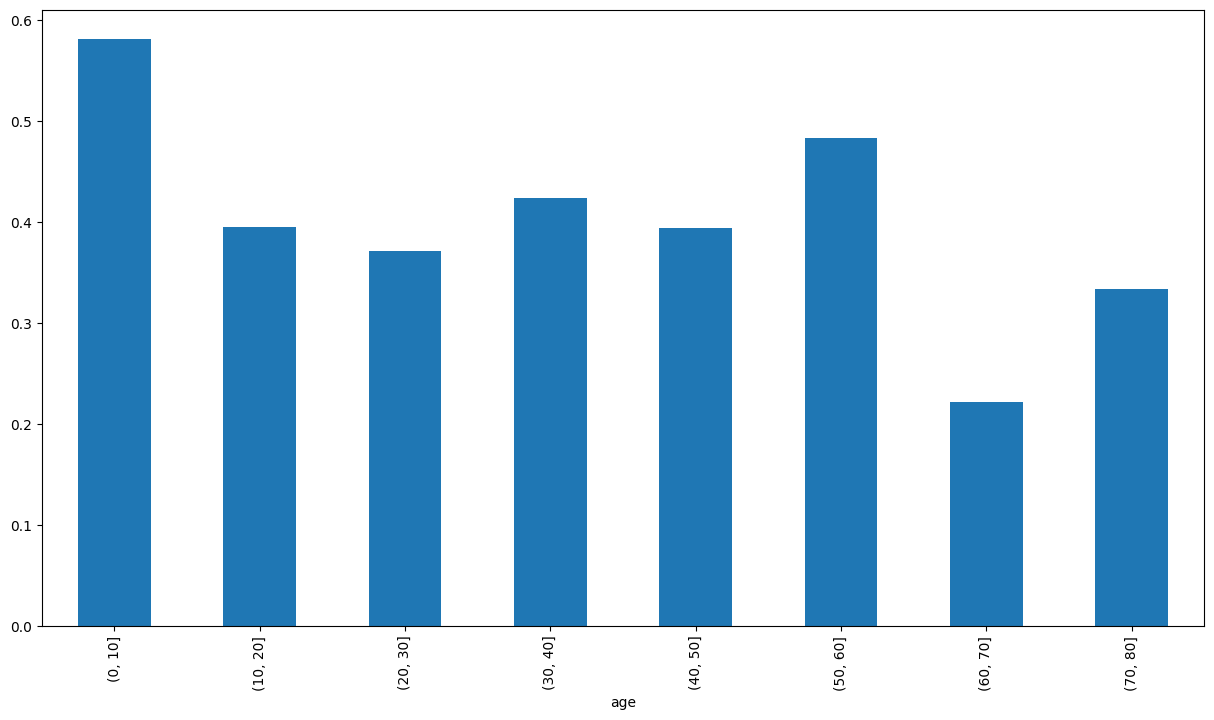

In [59]:
age_grouping.plot.bar();

In [37]:
group_by_age.value_counts()

,count
age,
"(20, 30]",361
"(30, 40]",210
"(10, 20]",162
"(40, 50]",132
"(0, 10]",86
"(50, 60]",62
"(60, 70]",27
"(70, 80]",6


### We have a fair amount of missing values (e.g., __`age`__, __`home.dest`__)

In [38]:
data.count()

,0
pclass,1309
survived,1309
name,1309
sex,1309
age,1046
sibsp,1309
parch,1309
fare,1308
embarked,1307
home.dest,745


### We can fill in the missing age values with average values. Is this a good strategy for this data? What could we exploit to make a better go of it? (Hint: Look at the class breakdowns above)

In [17]:
data = data.fillna(data.mean(numeric_only=True))

### Now we are basically missing home/destination data and a few embarked results

In [18]:
data.count()

,0
pclass,1309
survived,1309
name,1309
sex,1309
age,1309
sibsp,1309
parch,1309
fare,1309
embarked,1307
home.dest,745


### With only two results missing embarked data, we can probably just drop those samples.

In [60]:
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,"Cincinatti, OH"


### There are a substantial number of missing home/destination values. We don't know if that is an important feature, but we'd lose a lot of data if we throw those samples away, so let's fill it in with placeholders for now.

In [61]:
data["home.dest"] = data["home.dest"].fillna("NA")

### Now with only the two embarked rows missing, we are in good shape, so let's drop those and then move on.

In [62]:
data.count()

,0
pclass,1309
survived,1309
name,1309
sex,1309
age,1046
sibsp,1309
parch,1309
fare,1308
embarked,1307
home.dest,1309


In [63]:
data = data.dropna()

In [64]:
data.count()

,0
pclass,1043
survived,1043
name,1043
sex,1043
age,1043
sibsp,1043
parch,1043
fare,1043
embarked,1043
home.dest,1043


### We are going to turn categorical data (__`sex`__ and __`embarked`__) into numbered values using a Sci-Kit Learn __`LabelEncoder`__.

In [25]:
from sklearn import datasets, model_selection, tree, preprocessing, metrics
import sklearn.ensemble as ske

In [65]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()

    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name', 'home.dest'],axis=1)

    return processed_df

### We preprocess our data and then verify that everything is suitable for a learning activity now.

In [66]:
processed_df = preprocess_titanic_df(data)
processed_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


### The survival data is going to be our target so we drop it from the feature matrix and set up the target matrix.

In [67]:
X = processed_df.drop(['survived'], axis=1)
y = processed_df['survived']

### We now split our data into training and test data, create a DecisionTreeClassifier and then see how we do on predictions on survival.

In [68]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [69]:
clf_dt = tree.DecisionTreeClassifier(max_depth=2)

In [70]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.7655502392344498

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(clf_dt, out_file="titanic.dot",
               feature_names='pclass sex age sibsp parch fare embarked'.split(),
               class_names='perished survived'.split(),
               rounded=True,filled=True)

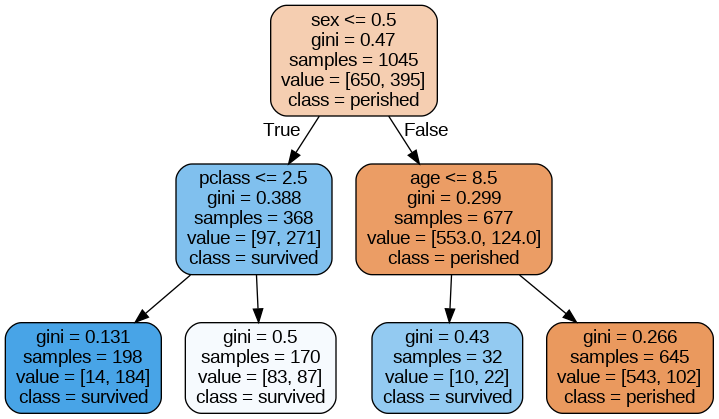

In [71]:
!dot -Tpng titanic.dot -o titanic.png
from IPython.display import Image
Image('titanic.png')

### Shuffling the data can sometimes improve our results.

In [39]:
shuffle_validator = model_selection.ShuffleSplit(len(X), test_size=0.2, random_state=0)

def test_classifier(clf):
    scores = model_selection.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [40]:
test_classifier(clf_dt)

Accuracy: 0.7731 (+/- 0.02)


### A RandomForestClassifier often does better.

In [72]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7765 (+/- 0.03)


### Other classifiers might do even better...

In [59]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8078 (+/- 0.02)


### Now we want to make a specific point, so we'll grab the first twenty rows of each passenger class from our raw data, clean them up and use them as our test data.

In [73]:
passengers_set_1 = data[data.pclass == 1].iloc[:20,:].copy()
passengers_set_2 = data[data.pclass == 2].iloc[:20,:].copy()
passengers_set_3 = data[data.pclass == 3].iloc[:20,:].copy()
passenger_set = pd.concat([passengers_set_1, passengers_set_2, passengers_set_3])
testing_set = preprocess_titanic_df(passenger_set)

### Normally you wouldn't train and test on the same data, but we're trying to make a point (and this is a closed system–we're not going to use our model on new, unseen data!)

In [74]:
training_set = pd.concat([data, passenger_set]).drop_duplicates(keep=False)
training_set = preprocess_titanic_df(training_set)

In [75]:
X = training_set.drop(['survived'], axis=1).values
y = training_set['survived'].values
X_test = testing_set.drop(['survived'], axis=1).values
y_test = testing_set['survived'].values

In [76]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf.fit(X, y)

RandomForestClassifier(n_estimators=50)

In [77]:
prediction = clf_rf.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

### Because this is historical data, we can compare predictions to what actually happened.
* Models are not destiny!
* ...some of the people our model thought would survive didn't and some of the people it thought wouldn't did.

In [78]:
passenger_set[passenger_set.survived != prediction]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S,"Hessle, Yorks"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C,"Montreal, PQ"
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,52.5542,S,"New York, NY"
336,2,1,"Beane, Mr. Edward",male,32.0,1,0,26.0000,S,"Norwich / New York, NY"
603,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,20.2500,S,"East Providence, RI"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,7.6500,S,"Perkins County, SD"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,7.9250,S,"Taalintehdas, Finland Hoboken, NJ"


In [79]:
clf_rf.score(X_test, y_test)

0.8166666666666667